In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00476/buddymove_holidayiq.csv')
features = ['Religious','Nature','Theatre','Shopping','Picnic']
x = data[features]
y = data.Sports

# print(x)
# print(y)

xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=0.25, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(ytest.shape, ytest.shape)



(186, 5) (186,)
(63,) (63,)


In [3]:
from sklearn.linear_model import Perceptron

clf= Perceptron()
clf.fit(xtrain, ytrain)
clf.score(x,y)

0.07228915662650602

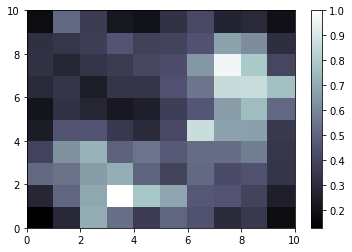

In [4]:
dataset=np.array(data)
Z=dataset[:,2:]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
Z = sc.fit_transform(Z)
from minisom import MiniSom
som = MiniSom( x = 10, y = 10, input_len = 5, sigma = 1.0, learning_rate = 0.6)
som.random_weights_init(Z)
som.train_random(data = Z, num_iteration = 100)

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(Z):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [3]:
# xtrain = xtrain.astype('float64')
# xtest = xtest.astype('float64')
# ytrain = ytrain.astype('float64')
# ytest = ytest.astype('float64')



In [ ]:
np.array(xtrain, dtype=np.float32)
np.array(xtrain,dtype=float)
# for test case 
np.array(xtest, dtype=np.float32)
np.array(xtest,dtype=float)



#  for y
np.array(ytrain, dtype=np.float32)
np.array(ytrain,dtype=float)
# for test case
np.array(ytest, dtype=np.float32)
np.array(ytest,dtype=float)



In [7]:
import sys
class Perceptron():

    def __init__(self):
        self.weights = np.random.normal(loc=0.0, scale=1.0, size=5)
        self.bias  = np.random.normal(loc = 0.0, scale=1.0, size=1)
    
    def activation(self, pred):
        """Using Binary Step Activation function"""
        return np.where(pred >= 0, 1, 0)

    def predict(self, data):
        """Return class label after unit step"""
        return self.activation(np.dot(data, self.weights))

    def accuracy(self, features, targets):
        """Check the accuracy of the predictied features"""
        predictions = self.predict(features)
        return (predictions == targets).mean()
    

    def train(self, xtrain, ytrain, xtest, ytest, epochs, lr=0.01):
        losses = []
        train_accuracies = []
        test_accuracies = []
        for e in range(1, epochs + 1):
            epoch_loss = 0

            for data, target in zip(xtrain, ytrain): 
                # Weight updation
                pred = self.predict(data)
                error = target - pred  # Calculating the error
                update = lr * error  
                epoch_loss += error ** 2 
                self.weights += update * data # updating the weights 
                self.bias += update # updating the Bias
            
            train_acc = self.accuracy(xtrain, ytrain)
            test_acc = self.accuracy(xtest, ytest)

            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)

            losses.append(epoch_loss)

            print(f"\rEpoch {e}/{epochs}, Loss : {epoch_loss}, Train Acc : {train_acc}, Test Acc : {test_acc}", end="")
            sys.stdout.flush()

        return {'losses': losses, 'train_acc': train_accuracies, 'test_acc': test_accuracies}

In [ ]:
model1 = Perceptron()
train_case = model1.train(xtrain,ytrain,xtest,ytest, epochs=30, lr = 0.1)